# EDA + Feature Engineering on Iris Dataset (Pandas + Matplotlib)
## Part A – Data Exploration
- Load the Dataset
    - Load iris.csv into a Pandas DataFrame.
    -Show shape, columns, dtypes, and first 5 rows.
- Summary Statistics
    - Use .describe() for numeric columns.
    - Find which species has the highest mean petal length.
- Data Quality
    - Check for missing values (.isna().sum()).
    - Check for duplicates and remove them if any.
- Univariate Analysis
    - Plot histograms of each feature (SepalLength, SepalWidth, PetalLength, PetalWidth).
    - Plot boxplots (Matplotlib’s plt.boxplot) for each feature grouped by species.
    - Identify which feature has the largest spread (variance).
- Bivariate Analysis
    - Create scatter plots:
        - SepalLength vs PetalLength (color by species).
        - SepalWidth vs PetalWidth.
    - Use different markers (o, s, ^) for species.
    - Which two features best separate the species visually?
- Correlation Analysis
    - Compute correlation matrix using .corr().
    - Plot as a heatmap-style table using Matplotlib (imshow + colorbar).
    - Which two features are most strongly correlated?

## Part B – Feature Engineering (Knowledge Engineering)
- Feature Transformation
    - Normalize features using (x - min) / (max - min).
    - Standardize features using (x - mean) / std.
    - Compare histograms of raw vs scaled values.
- New Features
    - Create:
        - SepalArea = SepalLength * SepalWidth
        - PetalArea = PetalLength * PetalWidth
    - Compare average values of new features across species with bar plots.
- Feature Binning
    - Bin Sepal Length into 3 categories: Short, Medium, Long.
    - Show species count within each bin using a bar chart.
- Encoding
    - Encode Species into numbers (0,1,2) using Pandas .factorize() or .astype('category').cat.codes.
    -   Print mapping.
- Dimensionality Reduction (Optional with Numpy + Matplotlib)
    - Apply PCA (2D) manually (you can use numpy.linalg.svd).
    - Scatter plot species in PCA space.
    - Do the clusters separate?

## Part C – Mini Assignment Questions
- Which feature shows the highest variance across the dataset?
- Which feature is the best predictor of species separation?
- Between SepalArea and PetalArea, which one separates species better?
- In your scatter plots, which species tends to overlap the most with others?
- Suggest two more new features you could engineer from existing columns.

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

## Part A - Data Exploration

### 1. Load the dataset

In [7]:
iris_df=sns.load_dataset('iris')

In [9]:
# First five head
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
#Shape
print(f"Shape of dataframe is {iris_df.shape}")

Shape of dataframe is (150, 5)


In [14]:
#Columns
print("Columns of Iris dataset are \n", iris_df.columns)    


Columns of Iris dataset are 
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [17]:
#dtype
print("Data of dataframe is \n")
iris_df.info()

Data of dataframe is 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Summary Statistics

In [35]:
print("describe numerical columns")
iris_df.describe()

describe numerical columns


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
print("species with highest mean petal length")
iris_df.groupby('species')['petal_length'].mean().sort_values(ascending=False).head(1)

species with highest mean petal length


species
virginica    5.552
Name: petal_length, dtype: float64

### 3. Data Quality

In [ ]:
# Check for missing values (.isna().sum())
print("Check for missing values")
iris_df.isna().sum()

Check for missing values


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Check for duplicates and remove them if any
print("check for duplicates")
iris_df.drop_duplicates(inplace=True)
iris_df

check for duplicates


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 4. Univariate Analysis

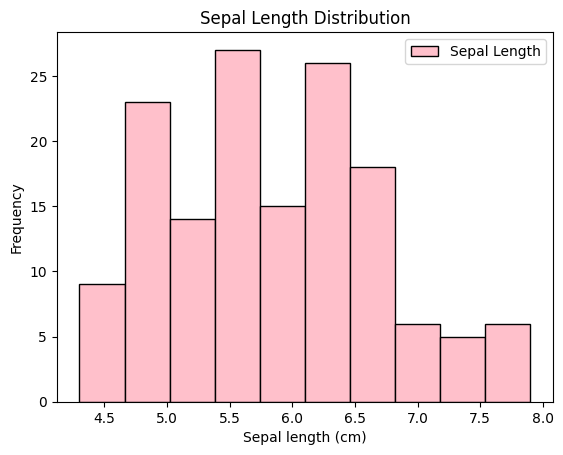

In [70]:
# Plot histograms of each feature (SepalLength, SepalWidth, PetalLength, PetalWidth).
iris_df['sepal_length'].plot(kind='hist',bins=10,edgecolor='black',label='Sepal Length',color='pink')
plt.legend()
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')
plt.show()

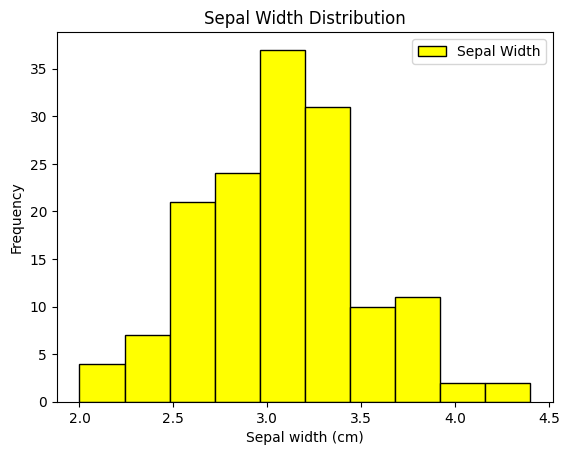

In [71]:
iris_df['sepal_width'].plot(kind='hist',bins=10,edgecolor='black',label='Sepal Width',color='yellow')
plt.legend()
plt.title('Sepal Width Distribution')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Frequency')
plt.show()

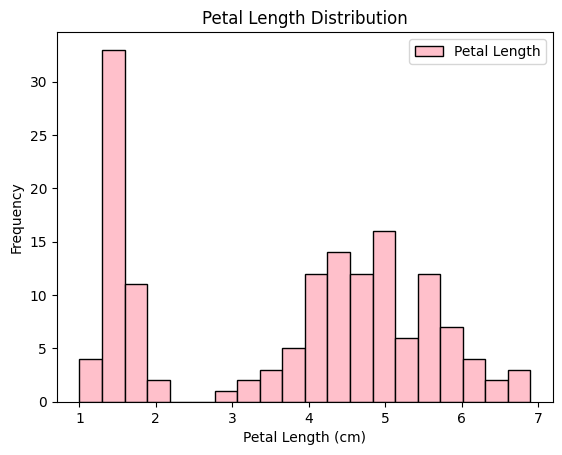

In [74]:
iris_df['petal_length'].plot(kind='hist',bins=20,edgecolor='black',label='Petal Length',color='pink')
plt.legend()
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

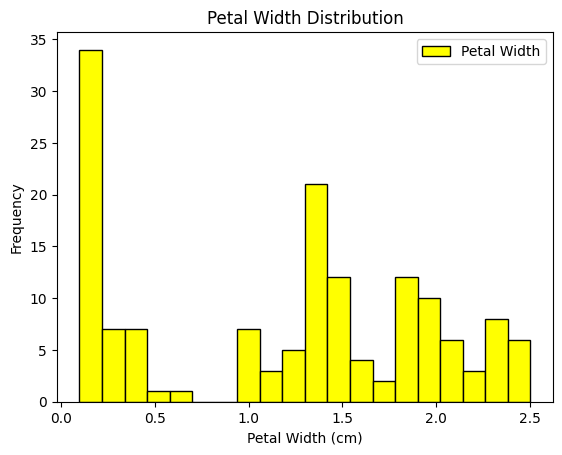

In [163]:
iris_df['petal_width'].plot(kind='hist',bins=20,edgecolor='black',label='Petal Width',color='yellow')
plt.legend()
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'cm')

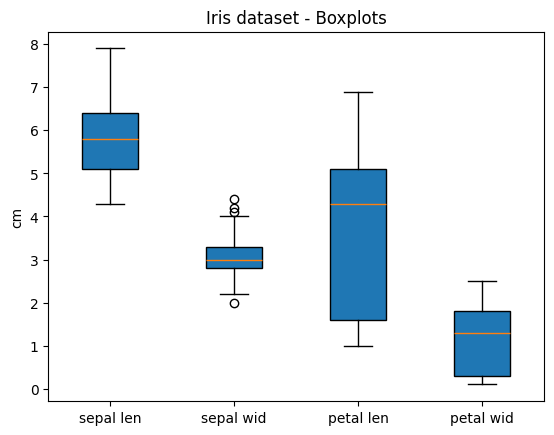

In [108]:
plt.boxplot(
    [iris_df['sepal_length'],iris_df['sepal_width'],iris_df['petal_length'],iris_df['petal_width']],
    tick_labels=['sepal len','sepal wid','petal len','petal wid'],patch_artist=True,vert=True)
plt.title('Iris dataset - Boxplots')
plt.ylabel('cm')

In [116]:
varience=[iris_df['sepal_width'].var(),iris_df['sepal_length'].var(),iris_df['petal_width'].var(),iris_df['petal_length'].var()]
print(varience)

[np.float64(0.19039452203881735), np.float64(0.6903138037366227), np.float64(0.58159259931072), np.float64(3.125083439143842)]


### Petal_Length has the largest spread (variance).

### 5. Bivariate Analysis

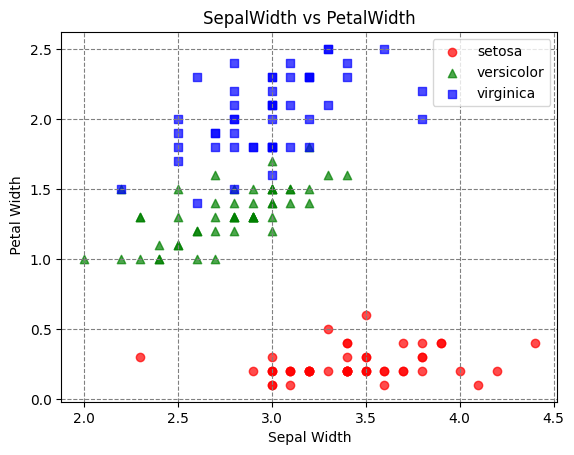

In [169]:
# SepalLength vs PetalLength (color by species).
colors={'setosa':'red','virginica':'blue','versicolor':'green'}
markers={'setosa':'o','virginica':'s','versicolor':'^'}
species=iris_df['species'].unique()
for s in species:
    subset=iris_df[iris_df['species']==s]
    plt.scatter(subset['sepal_width'],subset['petal_width'],c=colors[s],label=s,marker=markers[s],alpha=0.7)
plt.grid(color='gray',linestyle="--")
plt.title("SepalWidth vs PetalWidth")
plt.xlabel("Sepal Width")
plt.ylabel(" Petal Width")
plt.legend()
plt.show()

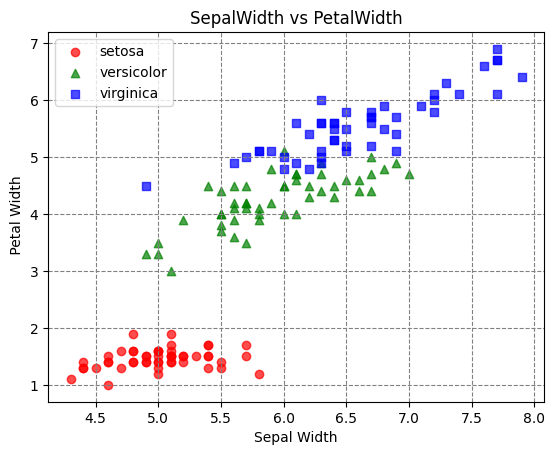

In [167]:
# SepalWidth vs PetalWidth
colors={'setosa':'red','virginica':'blue','versicolor':'green'}
markers={'setosa':'o','virginica':'s','versicolor':'^'}
species=iris_df['species'].unique()
for s in species:
    subset=iris_df[iris_df['species']==s]
    plt.scatter(subset['sepal_length'],subset['petal_length'],c=colors[s],label=s,marker=markers[s],alpha=0.7)
plt.grid(color='gray',linestyle="--")
plt.title("SepalWidth vs PetalWidth")
plt.xlabel("Sepal Width")
plt.ylabel(" Petal Width")
plt.legend()
plt.show()

### The Petal dimensions (Petal Length & Petal Width) provide the best visual separation of the three species

### 6. Correlation Matrix

In [192]:
corr_matrix=iris_df.corr(numeric_only=True)*100
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length    100.000000   -11.812926     87.373814    82.061952
sepal_width     -11.812926   100.000000    -42.602831   -36.289418
petal_length     87.373814   -42.602831    100.000000    96.277229
petal_width      82.061952   -36.289418     96.277229   100.000000


### Petal Length and Petal Width are most strongly correlated = 96.277229